In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
 
! pip install ipython-sql
 
users_path="https://s3-us-west-2.amazonaws.com/carvana-analytics-assignment/users.csv"
searches_path="https://s3-us-west-2.amazonaws.com/carvana-analytics-assignment/searches.csv"
vdps_path="https://s3-us-west-2.amazonaws.com/carvana-analytics-assignment/vdps.csv"
sales_path="https://s3-us-west-2.amazonaws.com/carvana-analytics-assignment/sales.csv"

# Read the data using pandas dataframe
users=pd.read_csv(users_path)
searches=pd.read_csv(searches_path)
vdps=pd.read_csv(vdps_path)
sales=pd.read_csv(sales_path)

# load ipython sql library 
%load_ext sql
%sql sqlite://
 
%sql persist users
%sql persist searches
%sql persist vdps
%sql persist sales

################################
#### do not alter this code ####


 * sqlite://
(sqlite3.OperationalError) near "persist": syntax error
[SQL: persist users]
(Background on this error at: http://sqlalche.me/e/13/e3q8)
 * sqlite://
(sqlite3.OperationalError) near "persist": syntax error
[SQL: persist searches]
(Background on this error at: http://sqlalche.me/e/13/e3q8)
 * sqlite://
(sqlite3.OperationalError) near "persist": syntax error
[SQL: persist vdps]
(Background on this error at: http://sqlalche.me/e/13/e3q8)
 * sqlite://
(sqlite3.OperationalError) near "persist": syntax error
[SQL: persist sales]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [2]:
# Display first five rows of the users data
users.head()

,user_id,region,treatment
0,1000,Southwest,Test
1,1001,New England,Test
2,1002,Southeast,Test
3,1003,Southwest,Test
4,1004,Southeast,Test


In [3]:
# Display first five rows of the searches data
searches.head()

,user_id,event_date_time,device_type,event_id
0,5006,2018-06-28 00:00:00,Mobile,1458680a-5853-4882-833d-4653e3b76bfb
1,9799,2018-06-28 00:00:03,Desktop,e482e4b4-1478-4753-a4af-340be5f84361
2,10766,2018-06-28 00:00:28,Desktop,00e1a3de-b0e4-4e53-8051-1f3a17725e0d
3,6983,2018-06-28 00:00:29,Desktop,7f681f33-d703-4823-9aea-d3286099aaf0
4,11257,2018-06-28 00:00:43,Mobile,ef835228-791f-46f6-a014-ccf993f15d34


In [4]:
#Display first five rows of the vdps data
vdps.head()

,user_id,event_date_time,device_type,event_id
0,5006,2018-06-28 00:02:05,Mobile,e57d406b-98de-447c-aa56-f54da6b29da8
1,6983,2018-06-28 00:02:17,Desktop,2a9727ee-5d1a-4bf2-bd1f-9a206f42eda9
2,11257,2018-06-28 00:03:05,Mobile,43b46bee-14ee-4860-88ba-e5b14a42ca90
3,9494,2018-06-28 00:03:12,Mobile,2d08ce20-a7d0-4c3d-9f7a-041374d1acda
4,2829,2018-06-28 00:04:00,Mobile,3b9d0c5f-e2c4-4302-8c01-c28ed1557663


In [5]:
#Display first five rows of the sales data
sales.head()

,user_id,event_date_time,device_type,event_id
0,13162,2018-06-28 02:02:21,Desktop,79ac532e-d4f2-4321-9c1e-749470069f99
1,3073,2018-06-28 02:03:05,Mobile,36386169-e1bf-4f84-8ccc-89453747ba1e
2,13902,2018-06-28 02:04:05,Desktop,b88987e3-4161-45ec-b061-c23a76139691
3,13329,2018-06-28 02:04:16,Desktop,324752ec-2ade-4502-9a8f-e9b10ff1f407
4,12460,2018-06-28 02:04:54,Desktop,b1621847-5543-4846-88e5-ca301c1b90d3


In [6]:
# Shape of searches and vdps data, it returns the number of rows and column. 
searches.shape,vdps.shape

((71212, 4), (17738, 4))

In [7]:
# Extract the unique values from region and treatment column in users dataset. 
users.region.unique(),users.treatment.unique()

(array(['Southwest', 'New England', 'Southeast', 'Midwest',
        'Pacific Northwest'], dtype=object),
 array(['Test', 'Control'], dtype=object))

1) Evaluate the effect of the new feature on engagement (searches and VDPs) and conversion using statistical significance where applicable


In [8]:
# Shape of users and searches data, it returns the number of rows and column. 
users.shape,searches.shape

((13000, 3), (71212, 4))

In [ ]:
# concat the three data set searches, sales and vdps
concat_data = pd.concat([searches,sales,vdps])

# Drop all null values from the dataset
clean_concat_data = concat_data.dropna()

# shape of data
clean_concat_data.shape

(90290, 4)

In [ ]:
# Merge users data and combine data based on user id. we use outer it will merge all records from both the dataset. 
all_data = pd.merge(users, clean_concat_data, on='user_id', how='outer')

In [ ]:
import numpy as np
# Drop null values from dataset
all_data_ = all_data.dropna()

# setting converted fields
all_data_['converted'] = np.random.randint(2, size=all_data_.shape[0])

# shape of data
all_data_.shape

(90290, 7)

In [ ]:
#Display first rows of all_data_
all_data_.head()

,user_id,region,treatment,event_date_time,device_type,event_id,converted
0,1000,Southwest,Test,2018-06-28 19:15:35,Mobile,5ad65c89-4328-407b-920a-ce537bbcb8ed,0
1,1000,Southwest,Test,2018-06-28 19:16:31,Mobile,f7640301-2fd1-4665-a686-c0f7bfc20c76,1
2,1000,Southwest,Test,2018-06-28 19:17:27,Mobile,dbb26ae1-b554-4efd-927a-c1bd2f300e34,0
3,1000,Southwest,Test,2018-06-28 19:18:15,Mobile,2ba3d011-55d1-4e8a-a4f6-28412268c006,0
4,1000,Southwest,Test,2018-06-28 19:19:14,Mobile,d6470d50-3fc5-4021-bb89-e98cf703a2b2,0


This histogram show the frequencies of test and control which is in treatement column. As show in the following chart both the frequency of test and control are around same. 

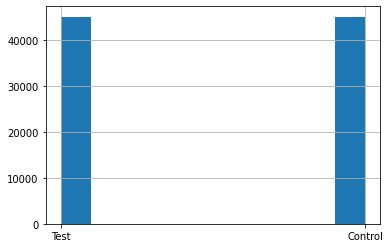

In [ ]:
# plot the histogram 
import matplotlib.pyplot as plt 
plt.hist(all_data_['treatment'])
plt.grid()
plt.show()

This histogram show the frequencies of Mobile and Desktop which is in device_type column. As shown in the following chart the frequency of Mobile is above 35000 and the frequency of Desktop is above 50000. Maximum number of times Users used Desktop compare to mobile device 

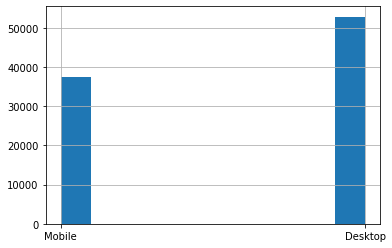

In [ ]:
plt.hist(all_data_['device_type'])
plt.grid()
plt.show()

2) Summarize and highlight insights (or issues) in user behavior across various segments

According to the dataset there are test count is 45101 and control is 45189

In [ ]:
# It return the count unique value is in treatment column
all_data_.treatment.value_counts()

Control    45189
Test       45101
Name: treatment, dtype: int64

According to the dataset maximum number of times users from Pacific Northwockest region which is 27910.

In [ ]:
# It return the count unique value is in region column
all_data_.region.value_counts()

Pacific Northwest    27910
Midwest              17744
Southwest            15768
Southeast            14551
New England          14317
Name: region, dtype: int64

According to the dataset maximum number of times users used Deskop 52863 times. 

In [ ]:
# It return the count unique value is in device_type column
all_data_.device_type.value_counts()

Desktop    52863
Mobile     37427
Name: device_type, dtype: int64

3) Provide a recommendation on whether or not to permanently deploy the feature to all users, some users, or no users

In [ ]:
# count the unique value user_id column 
session_counts = all_data_['user_id'].value_counts(ascending=False)

# total count the user id that appear more than 1 times in the dataset
multi_users = session_counts[session_counts > 1].count()

print(f'There are {multi_users} users that appear multiple times in the dataset')

There are 12656 users that appear multiple times in the dataset


In [ ]:
# Extract the user id whose count is more than 1
users_to_drop = session_counts[session_counts > 1].index

# Drop users 
all_data_ = all_data_[~all_data_['user_id'].isin(users_to_drop)]
print(f'The updated dataset now has {all_data_.shape[0]} entries')

The updated dataset now has 344 entries


In [ ]:
required_n = 100
# extract only those records treatment column value  is  control 
control_sample = all_data_[all_data_['treatment'] == 'Control'].sample(n=required_n, random_state=22)

# extract only those records treatment column value  is  Test 
test_sample = all_data_[all_data_['treatment'] == 'Test'].sample(n=required_n, random_state=22)

# concate both dataset 
ab_test = pd.concat([control_sample, test_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)

In [ ]:
# it return the count unique value of treatment column
all_data_.treatment.value_counts()

Control    207
Test       137
Name: treatment, dtype: int64

In [ ]:
#apply groupby function on ab_test data tratment column
conversion_rates = ab_test.groupby('treatment')['converted']

# Std. deviation of the proportion
std_p = lambda x: np.std(x, ddof=0)   

# Std. error of the proportion (std / sqrt(n))
se_p = lambda x: stats.sem(x, ddof=0)           

# conversion Rates of control and test 
conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']
conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
treatment,,,
Control,0.510,0.500,0.050
Test,0.580,0.494,0.049


Judging by the stats above, it does look like our two treatments performed very similarly, with our new feature performing slightly better, approx. 58% vs. 51% conversion rate. So in accordance to A/B test we should stick to our new features.